<a href="https://colab.research.google.com/github/AstridXiomara/LSTM/blob/main/Multivariate_LSTM_Optuna1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate LSTM Model

## Librerias

In [1]:
import numpy as np
import pandas as pd

# univariate lstm example
#import keras
from numpy import array
from numpy import hstack
import matplotlib.pyplot as plt
from datetime import datetime
import math

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import ConvLSTM2D
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.metrics import mean_squared_error

## Data

In [2]:
Constrains = pd.read_excel("Well Data Var.xlsx", sheet_name="Hoja1")
Constrains

,Pwf,Pwf2,Pwf3,Pwf4,Qw
0,3391,3286,3545,3541,1438
1,3516,3574,3297,3362,1170
2,3918,3468,3340,3085,1722
3,3972,3516,3396,3978,1671
4,3711,3546,3807,3773,548
5,3911,3758,3019,3709,967
6,3536,3678,3840,3530,818
7,3409,3275,3389,3831,1057
8,3114,3592,3436,3084,1138
9,3827,3809,3371,3766,1595


In [3]:
Production=pd.read_csv("Hoja1_results.csv", header=0, index_col=0)
Production

,0,1,2,3,4,5,6,7
0,1009.725364,677.975588,1683.374236,571.400305,0.000000,0.000000,0.000000,0.000000
1,701.721854,416.201622,946.422570,412.233996,0.007646,0.007878,0.018913,0.003323
2,675.849776,376.334852,823.549166,383.456721,0.008396,0.009304,0.021928,0.004275
3,665.542561,356.393406,766.447214,367.399296,0.008550,0.009895,0.022844,0.004791
4,658.972904,343.600407,733.636846,355.941247,0.008567,0.010208,0.023145,0.005146
...,...,...,...,...,...,...,...,...
356,104.020717,72.356329,124.298593,180.799889,442.098991,65.154675,425.571438,0.931140
357,103.619260,71.999299,123.654413,180.136330,441.037166,65.006586,425.178772,1.009742
358,103.230162,71.657921,123.033685,179.477546,440.088982,64.880222,424.825421,1.092265
359,102.852404,71.330698,122.434750,178.825734,439.239938,64.771734,424.502688,1.178638


In [4]:
Constrains2 = Constrains.copy(deep = True)
Constrains2['new_index'] = Constrains.index *15
Constrains2.set_index('new_index', inplace= True)


In [5]:
Production.drop(index=360,inplace=True)
Production.rename(index={359:360},inplace=True)

In [6]:
Production

,0,1,2,3,4,5,6,7
0,1009.725364,677.975588,1683.374236,571.400305,0.000000,0.000000,0.000000,0.000000
1,701.721854,416.201622,946.422570,412.233996,0.007646,0.007878,0.018913,0.003323
2,675.849776,376.334852,823.549166,383.456721,0.008396,0.009304,0.021928,0.004275
3,665.542561,356.393406,766.447214,367.399296,0.008550,0.009895,0.022844,0.004791
4,658.972904,343.600407,733.636846,355.941247,0.008567,0.010208,0.023145,0.005146
...,...,...,...,...,...,...,...,...
355,104.435622,72.730721,124.966025,181.465348,443.291818,65.329399,426.005989,0.856507
356,104.020717,72.356329,124.298593,180.799889,442.098991,65.154675,425.571438,0.931140
357,103.619260,71.999299,123.654413,180.136330,441.037166,65.006586,425.178772,1.009742
358,103.230162,71.657921,123.033685,179.477546,440.088982,64.880222,424.825421,1.092265


In [7]:
join = Constrains2.join(Production, how = 'inner')
join


,Pwf,Pwf2,Pwf3,Pwf4,Qw,0,1,2,3,4,5,6,7
0,3391,3286,3545,3541,1438,1009.725364,677.975588,1683.374236,571.400305,0.000000,0.000000,0.000000,0.000000
15,3516,3574,3297,3362,1170,570.918516,231.898717,797.543919,346.285673,0.007434,0.007929,0.028257,0.007277
30,3918,3468,3340,3085,1722,360.469808,260.930138,580.721992,351.937395,0.005550,0.008295,0.027352,0.010564
45,3972,3516,3396,3978,1671,447.214593,251.667978,604.774850,122.392607,0.003150,0.007467,0.024358,0.004080
60,3711,3546,3807,3773,548,511.215305,255.674263,384.373333,269.430474,24.197117,0.006692,0.126044,0.004123
75,3911,3758,3019,3709,967,224.908669,151.202454,788.577439,217.234170,83.892531,0.005232,89.064064,0.005616
90,3536,3678,3840,3530,818,310.883287,181.023070,69.158209,225.738601,164.319419,0.005928,20.331166,0.007227
105,3409,3275,3389,3831,1057,270.826391,256.772330,449.389245,119.694587,183.232529,0.009657,202.657079,0.004780
120,3114,3592,3436,3084,1138,308.929255,117.996943,289.325809,309.369328,259.187062,0.006541,168.237800,0.011050
135,3827,3809,3371,3766,1595,100.603427,95.272161,297.409239,70.416139,103.008928,0.014014,225.644583,0.003922


In [8]:
data=join.to_numpy()
data

array([[3.39100000e+03, 3.28600000e+03, 3.54500000e+03, 3.54100000e+03,
        1.43800000e+03, 1.00972536e+03, 6.77975588e+02, 1.68337424e+03,
        5.71400305e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [3.51600000e+03, 3.57400000e+03, 3.29700000e+03, 3.36200000e+03,
        1.17000000e+03, 5.70918516e+02, 2.31898717e+02, 7.97543919e+02,
        3.46285673e+02, 7.43352080e-03, 7.92927979e-03, 2.82565193e-02,
        7.27737804e-03],
       [3.91800000e+03, 3.46800000e+03, 3.34000000e+03, 3.08500000e+03,
        1.72200000e+03, 3.60469808e+02, 2.60930138e+02, 5.80721992e+02,
        3.51937395e+02, 5.55001916e-03, 8.29522195e-03, 2.73524215e-02,
        1.05637160e-02],
       [3.97200000e+03, 3.51600000e+03, 3.39600000e+03, 3.97800000e+03,
        1.67100000e+03, 4.47214593e+02, 2.51667978e+02, 6.04774850e+02,
        1.22392607e+02, 3.14953806e-03, 7.46684480e-03, 2.43576345e-02,
        4.08043344e-03],
       [3.71100000e+03, 3.54600000e+

In [9]:
bhp_1 = data[:,0]
bhp_2 = data[:,1]
bhp_3 = data[:,2]
bhp_4 = data[:,3]
Qw    = data[:,4]
oil_1 = data[:,5]
oil_2 = data[:,6]
oil_3 = data[:,7]
oil_4 = data[:,8]
wat_1 = data[:,9]
wat_2 = data[:,10]
wat_3 = data[:,11]
wat_4 = data[:,12]

## Funciones

### Preparar Data

In [10]:
# Divide el dataset en subsets train/test.
def train_test_split(data, n_test):
    return data[:-n_test,:], data[-n_test:,:]

In [11]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [12]:
#PRUEBA SPLIT
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

### Vanilla, Stacked, Bidirectional

In [13]:
# Modelo

def modelo(n_features, LSTM_model, x_train, y_train):
  if LSTM_model=="Vanilla":
    # define model
    model = Sequential()
    #Number of LSTM in hidden layer=50
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
  elif LSTM_model=="Stacked":
    # define model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
  elif LSTM_model=="Bidirectional":
    # define model
    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
  # fit model
  model.fit(x_train, y_train, epochs=200, verbose=0)

  return model

In [14]:
# Prediccion

def prediccion (x_test, y_test, model, n_steps, n_features):
  yhat=np.zeros(len(y_test))
  for i in range (0, len(y_test)):
    # demonstrate prediction
    x_input = array(x_test[i,:,:])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat[i] = model.predict(x_input, verbose=0)


  RMSE = math.sqrt(mean_squared_error(y_test, yhat))
  return yhat, RMSE

### CNN LSTM

In [ ]:
#CNN
def CNN_LSTM(n_features, n_seq, n_steps, x_train, y_train, LSTM_model):
  X = x_train.reshape((x_train.shape[0], n_seq, n_steps, n_features))

  # define model
  model = Sequential()
  model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
  model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
  model.add(TimeDistributed(Flatten()))
  if LSTM_model=="Vanilla":
    # define model
    #Number of LSTM in hidden layer=50
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
  elif LSTM_model=="Stacked":
    # define model
    model.add(LSTM(50, activation='relu', return_sequences=True))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
  elif LSTM_model=="Bidirectional":
    # define model
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

  # fit model
  model.fit(X, y_train, epochs=500, verbose=0)
  return model


In [ ]:
def CNN_pred(x_test, y_test, n_seq, n_steps, n_features, model):
  X = x_test.reshape((x_test.shape[0], n_seq, n_steps, n_features))
  yhat=np.zeros(len(y_test))
  for i in range (0, len(y_test)):
    x_input = array(X[i,:,:])
    x_input = x_input.reshape((1, n_seq, n_steps, n_features))
    yhat[i] = model.predict(x_input, verbose=0)
  
  RMSE=math.sqrt(mean_squared_error(y_test, yhat))
  #RMSE = math.sqrt(mean_squared_error( y_test, yhat))
  return (yhat, RMSE)

### Conv LSTM

In [ ]:
def Conv_LSTM(n_features, n_seq, n_steps, x_train, y_train):
  X = x_train.reshape((x_train.shape[0], n_seq, 1, n_steps, n_features))

  # define model
  model = Sequential()
  model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
  model.add(Flatten())
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')

  # fit model
  model.fit(X, y_train, epochs=500, verbose=0)

  return model

In [ ]:
def Conv_Predict(x_test, y_test, n_seq, n_steps, n_features,model):
  #X = x_test.reshape((x_test.shape[0], n_seq, n_steps, n_features))
  yhat=np.zeros(len(y_test))
  for i in range (0, len(y_test)):
    x_input = array(x_test[i,:,:])
    x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
    yhat[i] = model.predict(x_input, verbose=0)
  
  RMSE=math.sqrt(mean_squared_error(y_test, yhat))
  #RMSE = math.sqrt(mean_squared_error( y_test, yhat))
  return (yhat, RMSE)

## Corrida

### Data

In [15]:
# convert to [rows, columns] structure
BHP = bhp_1.reshape((len(bhp_1),1))
QW  = Qw.reshape((len(Qw),1))
qo = oil_1.reshape((len(oil_1),1))

In [16]:
# horizontally stack columns
dataset = hstack((BHP, QW, qo))
dataset

array([[3391.        , 1438.        , 1009.72536429],
       [3516.        , 1170.        ,  570.9185158 ],
       [3918.        , 1722.        ,  360.46980766],
       [3972.        , 1671.        ,  447.21459253],
       [3711.        ,  548.        ,  511.21530483],
       [3911.        ,  967.        ,  224.90866948],
       [3536.        ,  818.        ,  310.88328708],
       [3409.        , 1057.        ,  270.82639123],
       [3114.        , 1138.        ,  308.92925533],
       [3827.        , 1595.        ,  100.60342718],
       [3435.        ,  796.        ,  267.85364454],
       [3024.        , 1403.        ,  275.9265558 ],
       [3885.        , 1834.        ,   70.43272628],
       [3874.        , 1123.        ,  159.89306043],
       [3851.        , 1662.        ,  134.27623577],
       [3805.        , 1993.        ,  153.17167804],
       [3971.        ,  750.        ,  134.08596386],
       [3305.        , 1520.        ,  215.22679813],
       [3499.        , 1872.

In [17]:
train, test = train_test_split(dataset, 10)
train

array([[3391.        , 1438.        , 1009.72536429],
       [3516.        , 1170.        ,  570.9185158 ],
       [3918.        , 1722.        ,  360.46980766],
       [3972.        , 1671.        ,  447.21459253],
       [3711.        ,  548.        ,  511.21530483],
       [3911.        ,  967.        ,  224.90866948],
       [3536.        ,  818.        ,  310.88328708],
       [3409.        , 1057.        ,  270.82639123],
       [3114.        , 1138.        ,  308.92925533],
       [3827.        , 1595.        ,  100.60342718],
       [3435.        ,  796.        ,  267.85364454],
       [3024.        , 1403.        ,  275.9265558 ],
       [3885.        , 1834.        ,   70.43272628],
       [3874.        , 1123.        ,  159.89306043],
       [3851.        , 1662.        ,  134.27623577]])

In [18]:
# choose a number of time steps
n_steps = 4
# convert into input/output
x_train, y_train = split_sequences(train, n_steps,1)
x_test, y_test = split_sequences(test, n_steps,1)

In [19]:
x_train, y_train

(array([[[3391., 1438.],
         [3516., 1170.],
         [3918., 1722.],
         [3972., 1671.]],
 
        [[3516., 1170.],
         [3918., 1722.],
         [3972., 1671.],
         [3711.,  548.]],
 
        [[3918., 1722.],
         [3972., 1671.],
         [3711.,  548.],
         [3911.,  967.]],
 
        [[3972., 1671.],
         [3711.,  548.],
         [3911.,  967.],
         [3536.,  818.]],
 
        [[3711.,  548.],
         [3911.,  967.],
         [3536.,  818.],
         [3409., 1057.]],
 
        [[3911.,  967.],
         [3536.,  818.],
         [3409., 1057.],
         [3114., 1138.]],
 
        [[3536.,  818.],
         [3409., 1057.],
         [3114., 1138.],
         [3827., 1595.]],
 
        [[3409., 1057.],
         [3114., 1138.],
         [3827., 1595.],
         [3435.,  796.]],
 
        [[3114., 1138.],
         [3827., 1595.],
         [3435.,  796.],
         [3024., 1403.]],
 
        [[3827., 1595.],
         [3435.,  796.],
         [3024., 1403.]

In [20]:
x_train.shape, y_train.shape

((12, 4, 2), (12, 1))

In [21]:
# the dataset knows the number of features, e.g. 2
n_features = x_train.shape[2]

### Vanilla, Stacked, Bidirectional

In [22]:
model1=modelo(n_features, "Vanilla", x_train, y_train)
model2=modelo(n_features, "Stacked", x_train, y_train)
model3=modelo(n_features, "Bidirectional", x_train, y_train)


n_seq = 2
n_steps = 2
XCNN = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [23]:
y1, RMSE1 = prediccion (x_test, y_test, model1, n_steps, n_features)
y2, RMSE2 = prediccion (x_test, y_test, model2, n_steps, n_features)
y3, RMSE3 = prediccion (x_test, y_test, model3, n_steps, n_features)

y_test, y1, RMSE1, y2, RMSE2, y3, RMSE3

(array([[143.90230034],
        [197.67767855],
        [193.32518158],
        [156.08634443],
        [ 97.54444025],
        [105.53927305],
        [102.85240428]]),
 array([135.27842712,   3.46919537,  24.29493523, 316.74362183,
        233.16577148, 185.74003601, 484.97665405]),
 193.83997126741443,
 array([ 76.29072571, 230.98318481, 222.72946167, 250.96972656,
        286.23217773, 361.02365112, 341.29959106]),
 157.33514740712732,
 array([171.77319336,  78.67050934,  73.76399231,  78.62300873,
        128.13694763,  76.6680603 , 163.49406433]),
 76.23441173401895)

### CNN LSTM

In [ ]:
#CNN

n_seq=2
n_steps=2

model4=CNN_LSTM(n_features, n_seq, n_steps, x_train, y_train, "Vanilla")
model5=CNN_LSTM(n_features, n_seq, n_steps, x_train, y_train, "Stacked")
model6=CNN_LSTM(n_features, n_seq, n_steps, x_train, y_train, "Bidirectional")



In [ ]:
y4, RMSE4= CNN_pred(x_test, y_test, n_seq, n_steps, n_features, model4) 
y5, RMSE5= CNN_pred(x_test, y_test, n_seq, n_steps, n_features, model5) 
y6, RMSE6= CNN_pred(x_test, y_test, n_seq, n_steps, n_features, model6) 


In [ ]:
y_test, y4, RMSE4, y5, RMSE5, y6, RMSE6

(array([143.90230034, 197.67767855, 193.32518158, 156.08634443,
         97.54444025, 105.53927305, 102.85240428]),
 array([134.81874084,  94.03327179,  79.40483093, 186.89511108,
        200.16641235, 161.97836304, 337.53930664]),
 115.6017070307466,
 array([194.29463196, 181.29937744, 205.99008179, 195.20967102,
        196.25556946, 181.7154541 , 338.79418945]),
 104.00130067509045,
 array([191.98980713, 155.10758972, 164.10723877, 156.53681946,
        201.06999207, 161.70909119, 291.23297119]),
 88.10573049375888)

### Conv LSTM

In [ ]:
# Conv LSTM
model7=Conv_LSTM(n_features, n_seq, n_steps, x_train, y_train)
y7, RMSE7= Conv_Predict(x_test, y_test, n_seq, n_steps, n_features,model7)
y7, RMSE7

(array([271.04669189, 215.39813232, -38.47021484, 174.68611145,
        152.20588684, 259.70855713, 257.60464478]), 131.61581850053136)

### Plot

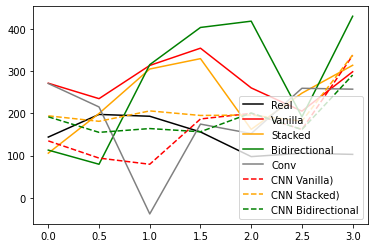

In [ ]:
xx=np.linspace(0, 3, 7)
plt.plot(xx, y_test, color="black", linestyle='solid',  label='Real')
plt.plot(xx, y1,     color="red",   linestyle='solid',  label='Vanilla')
plt.plot(xx, y2,     color="orange",linestyle='solid',  label='Stacked')
plt.plot(xx, y3,     color="green", linestyle='solid',  label='Bidirectional')
plt.plot(xx, y7,     color="grey",  linestyle='solid',  label='Conv')
plt.plot(xx, y4,     color="red",   linestyle='dashed', label='CNN Vanilla)')
plt.plot(xx, y5,     color="orange",linestyle='dashed', label='CNN Stacked)')
plt.plot(xx, y6,     color="green", linestyle='dashed', label='CNN Bidirectional')
plt.legend();